<a href="https://colab.research.google.com/github/VrajPatel18011/202418011/blob/main/Classification(Project_Feature_Finder).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title: Classification of Drug Efficacy

### Introduction
#### This project is aimed at classifying drug efficacy in patients based on various features such as demographics, medical conditions, and drug response rates. Visualizations help in understanding the relationships between different variables and the efficacy of drugs.

### Table of Contents
1. Dependencies
2. Data Loading
3. Data Preprocessing
4. Data Visualization
5. Model Evaluation
6. Conclusion

# Dependencies

### This project requires the following Python libraries:

* pandas
* numpy
* seaborn
* matplotlib
* scikit

# Data Loading and Overview

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_excel('/content/drive/MyDrive/Project/Raw_Healthcare_datasets/pharma_data.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          20000 non-null  int64 
 1   Gender                       20000 non-null  int64 
 2   Medical Condition            20000 non-null  object
 3   Medication                   20000 non-null  object
 4   Admission Type               20000 non-null  object
 5   Test Results                 20000 non-null  object
 6   dose                         20000 non-null  object
 7   Ethnicity                    20000 non-null  object
 8   Durations                    20000 non-null  int64 
 9   Documented ADRs              20000 non-null  int64 
 10  Previous allergic reactions  20000 non-null  object
 11  Concurrent medications       20000 non-null  object
 12  Drug class                   20000 non-null  object
 13  Baseline health status       20

# Data Preprocessing

#### List of changes in dataset

* Make Female to 0 and Male to 1 to convert Gender datatype from object to int
* Make Duration values to int by removing 'duration' word from values
* Remove 'ADR' word from Documented ADRs to convert it in numerical

In [ ]:
# df['Gender'] = df['Gender'].str.lower()
df['Gender'] = df['Gender'].replace({'male': 1, 'female': 0})
df['Gender'] = df['Gender'].astype(int)

# df['Durations'] = df['Durations'].str.replace('Duration', '')
df['Durations'] = df['Durations'].astype(int)

# df['Documented ADRs'] = df['Documented ADRs'].str.replace('ADR', '')
df['Documented ADRs'] = df['Documented ADRs'].astype(int)


# Data Visualizing

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Pairplot of Response Rates and Other Features

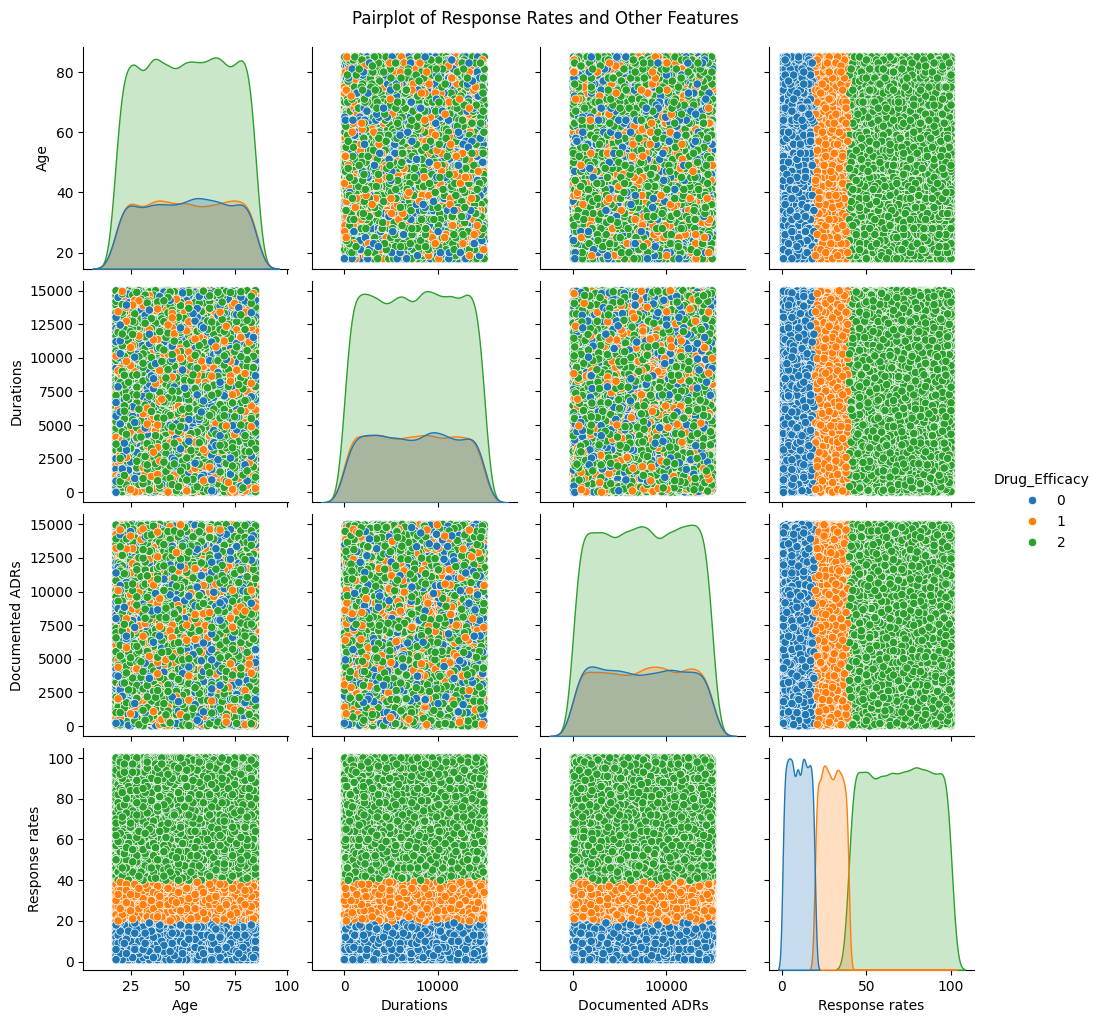

In [ ]:
df['Drug_Efficacy'] = df['Drug_Efficacy'].astype('category')

numeric_columns = ['Age', 'Durations', 'Documented ADRs', 'Response rates']

columns_to_plot = numeric_columns + ['Drug_Efficacy']

sns.pairplot(df[columns_to_plot], hue='Drug_Efficacy', diag_kind='kde')

plt.suptitle('Pairplot of Response Rates and Other Features', y=1.02)
plt.show()


### Documented ADRs by Various Features

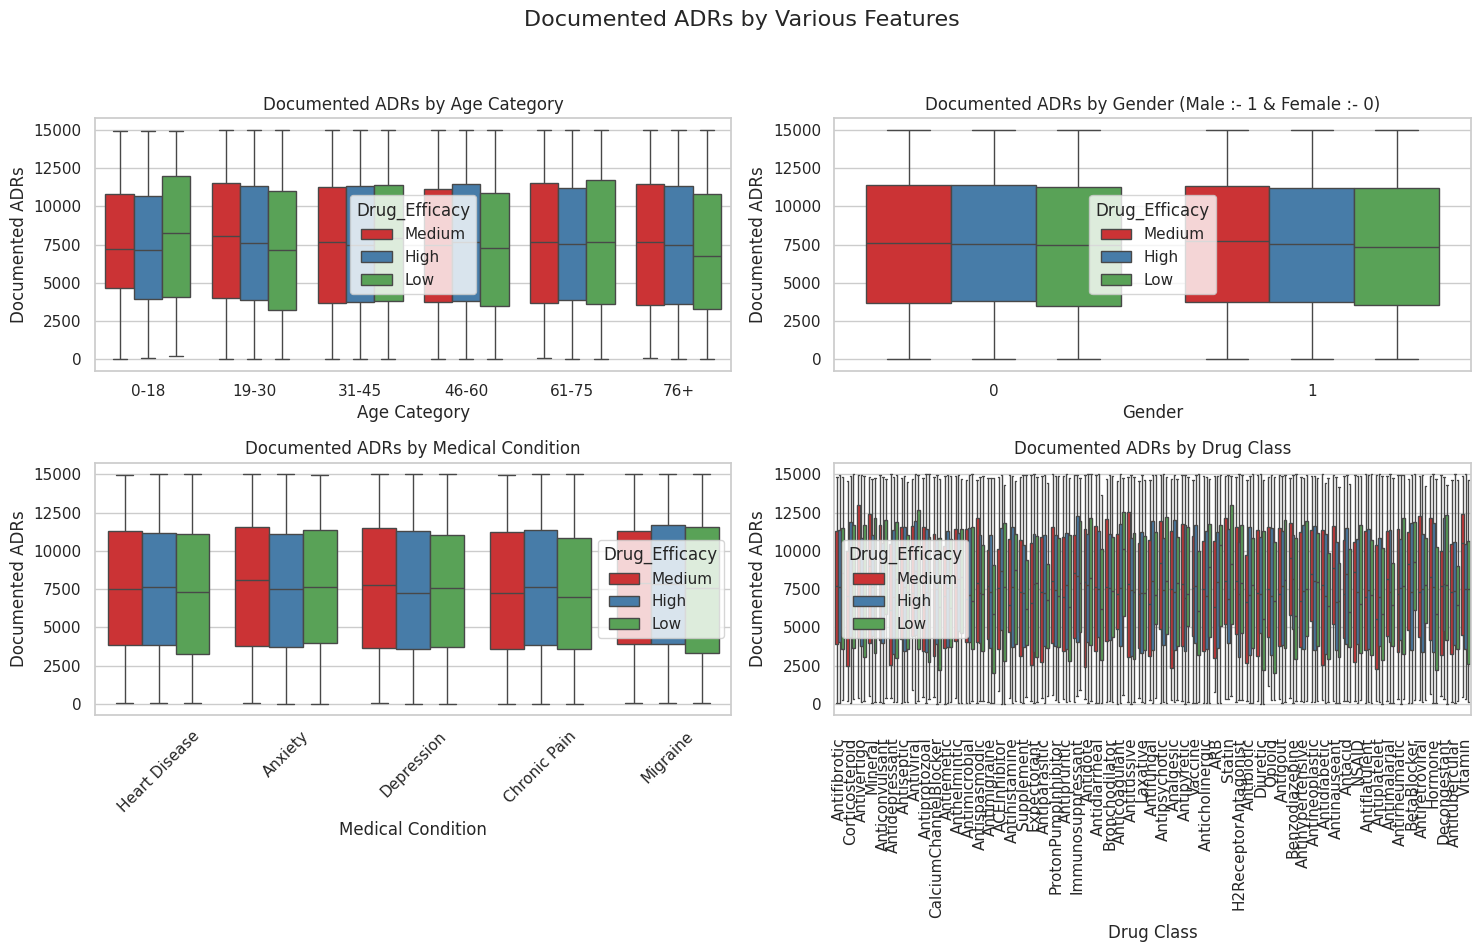

In [ ]:

df['Age Category'] = pd.cut(df['Age'], bins=[0, 18, 30, 45, 60, 75, 100], labels=['0-18', '19-30', '31-45', '46-60', '61-75', '76+'])

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Documented ADRs by Various Features', fontsize=16)

sns.boxplot(x='Age Category', y='Documented ADRs',hue='Drug_Efficacy',palette='Set1', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Documented ADRs by Age Category')
axes[0, 0].set_xlabel('Age Category')
axes[0, 0].set_ylabel('Documented ADRs')

sns.boxplot(x='Gender', y='Documented ADRs',hue='Drug_Efficacy',palette='Set1', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Documented ADRs by Gender (Male :- 1 & Female :- 0)')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Documented ADRs')

sns.boxplot(x='Medical Condition', y='Documented ADRs',hue='Drug_Efficacy',palette='Set1', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Documented ADRs by Medical Condition')
axes[1, 0].set_xlabel('Medical Condition')
axes[1, 0].set_ylabel('Documented ADRs')
axes[1, 0].tick_params(axis='x', rotation=45)

sns.boxplot(x='Drug class', y='Documented ADRs',hue='Drug_Efficacy',palette='Set1', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Documented ADRs by Drug Class')
axes[1, 1].set_xlabel('Drug Class')
axes[1, 1].set_ylabel('Documented ADRs')
axes[1, 1].tick_params(axis='x', rotation=90,pad=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Response rates by Various Features

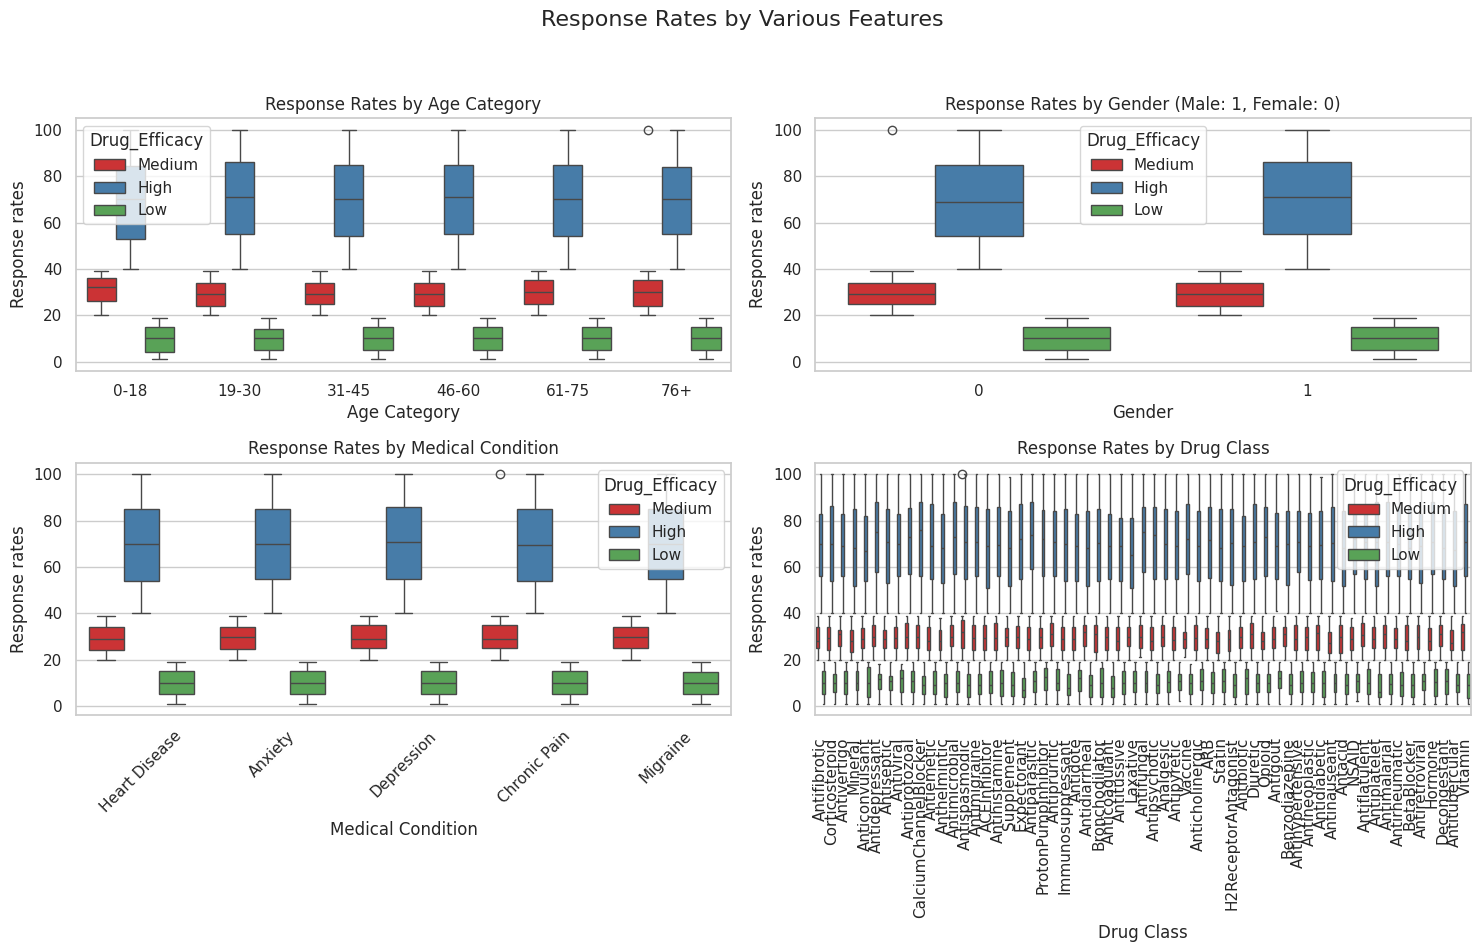

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df['Age Category'] = pd.cut(df['Age'], bins=[0, 18, 30, 45, 60, 75, 100], labels=['0-18', '19-30', '31-45', '46-60', '61-75', '76+'])

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Response Rates by Various Features', fontsize=16)

sns.boxplot(x='Age Category', y='Response rates',hue='Drug_Efficacy',palette='Set1', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Response Rates by Age Category')
axes[0, 0].set_xlabel('Age Category')
axes[0, 0].set_ylabel('Response rates')

sns.boxplot(x='Gender', y='Response rates',hue='Drug_Efficacy',palette='Set1', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Response Rates by Gender (Male: 1, Female: 0)')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Response rates')

sns.boxplot(x='Medical Condition', y='Response rates',hue='Drug_Efficacy',palette='Set1', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Response Rates by Medical Condition')
axes[1, 0].set_xlabel('Medical Condition')
axes[1, 0].set_ylabel('Response rates')
axes[1, 0].tick_params(axis='x', rotation=45)

sns.boxplot(x='Drug class', y='Response rates',hue='Drug_Efficacy',palette='Set1', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Response Rates by Drug Class')
axes[1, 1].set_xlabel('Drug Class')
axes[1, 1].set_ylabel('Response rates')
axes[1, 1].tick_params(axis='x', rotation=90, pad=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Relationship between Medical Condition and Age

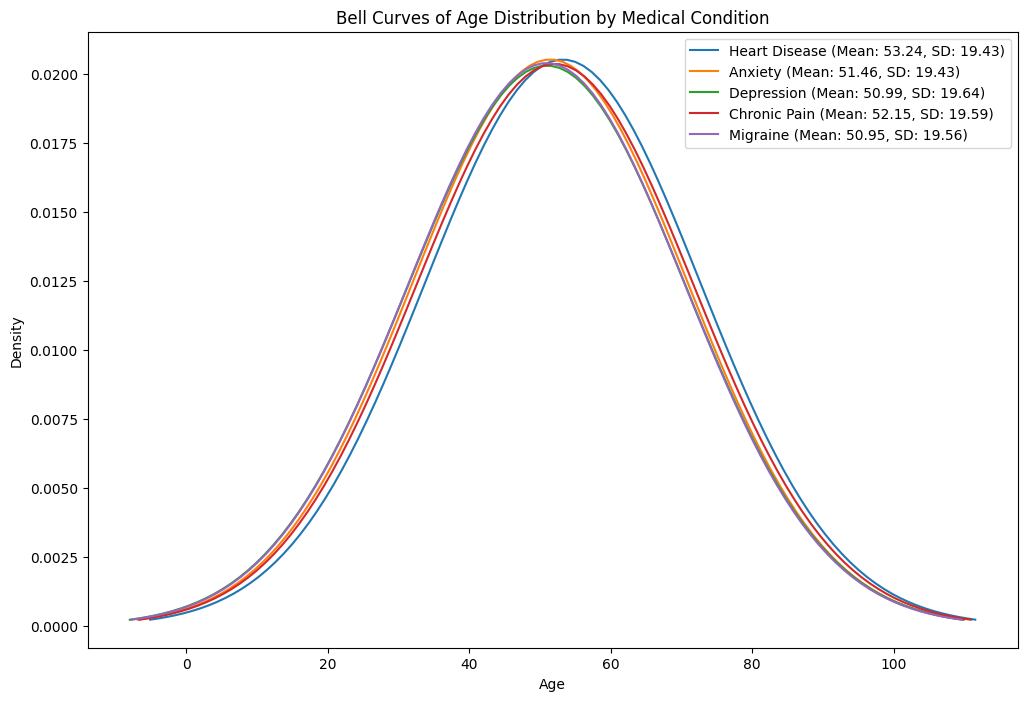

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

df_filtered = df[['Medical Condition', 'Age']].dropna()

plt.figure(figsize=(12, 8))

for condition in df_filtered['Medical Condition'].unique():
    age_data = df_filtered[df_filtered['Medical Condition'] == condition]['Age']
    mean_age, std_age = age_data.mean(), age_data.std()
    x = np.linspace(mean_age - 3 * std_age, mean_age + 3 * std_age, 100)
    plt.plot(x, norm.pdf(x, mean_age, std_age), label=f'{condition} (Mean: {mean_age:.2f}, SD: {std_age:.2f})')

plt.title('Bell Curves of Age Distribution by Medical Condition')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()


###  Average Response Rates by Admission Type

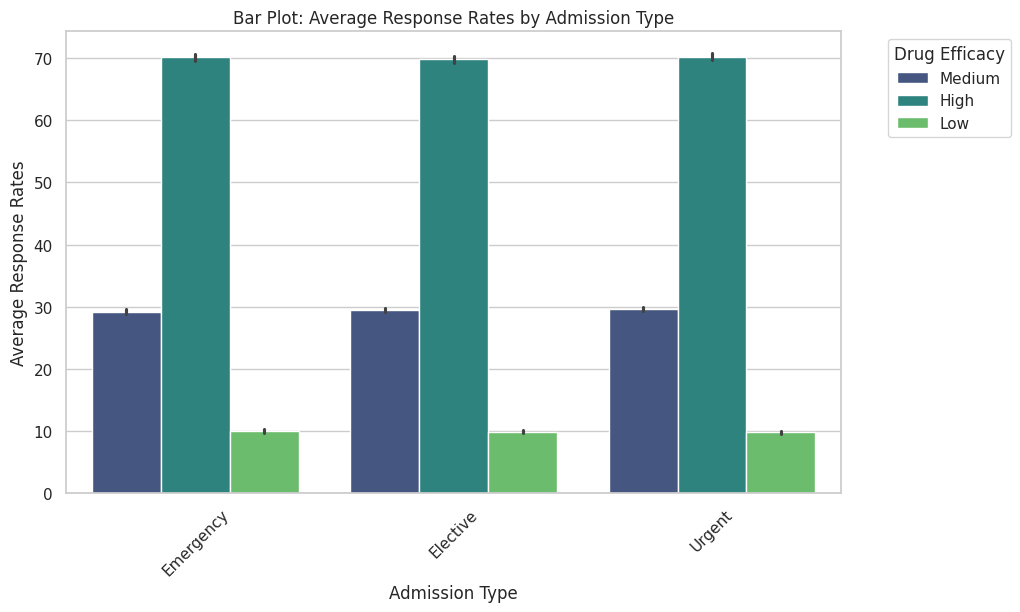

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Admission Type', y='Response rates', hue='Drug_Efficacy', palette='viridis')
plt.title('Bar Plot: Average Response Rates by Admission Type')
plt.xlabel('Admission Type')
plt.ylabel('Average Response Rates')
plt.xticks(rotation=45)
plt.legend(title='Drug Efficacy', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Documented ADRs over Age distributions

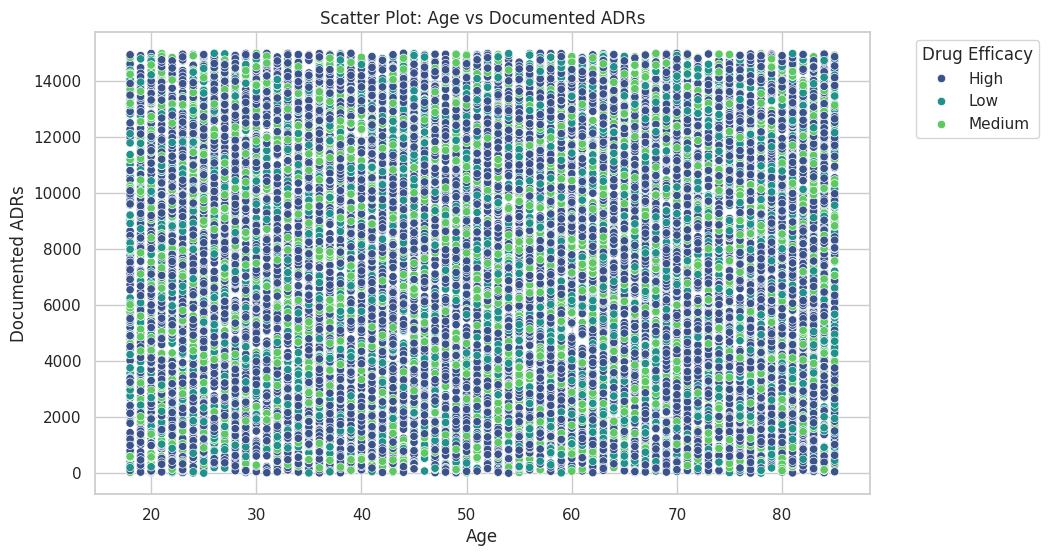

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Documented ADRs', hue='Drug_Efficacy', palette='viridis')
plt.title('Scatter Plot: Age vs Documented ADRs')
plt.xlabel('Age')

plt.ylabel('Documented ADRs')
plt.legend(title='Drug Efficacy', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Durations by Gender

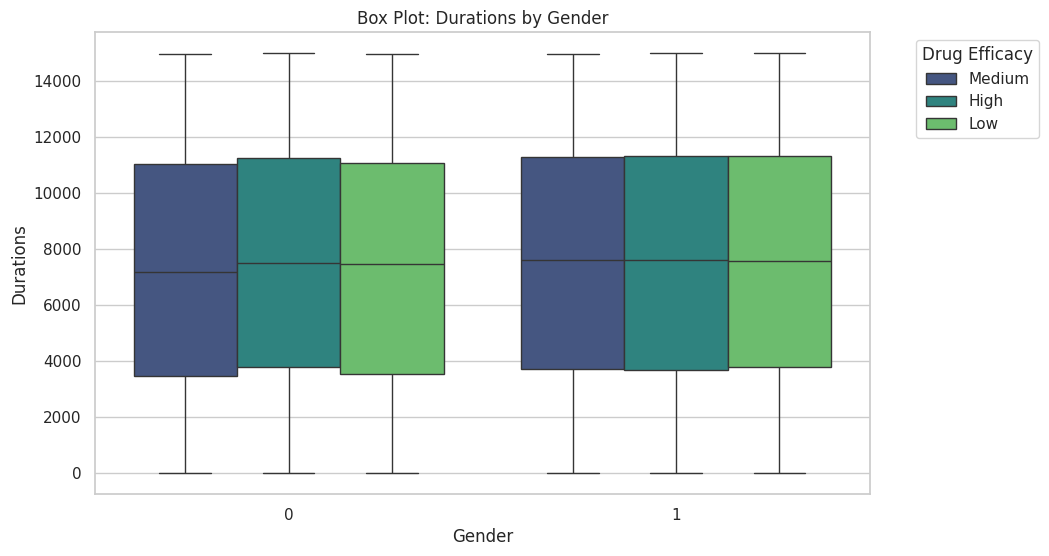

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='Durations', hue='Drug_Efficacy', palette='viridis')
plt.title('Box Plot: Durations by Gender')
plt.xlabel('Gender')
plt.ylabel('Durations')
plt.legend(title='Drug Efficacy', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Response Rates by Ethnicity

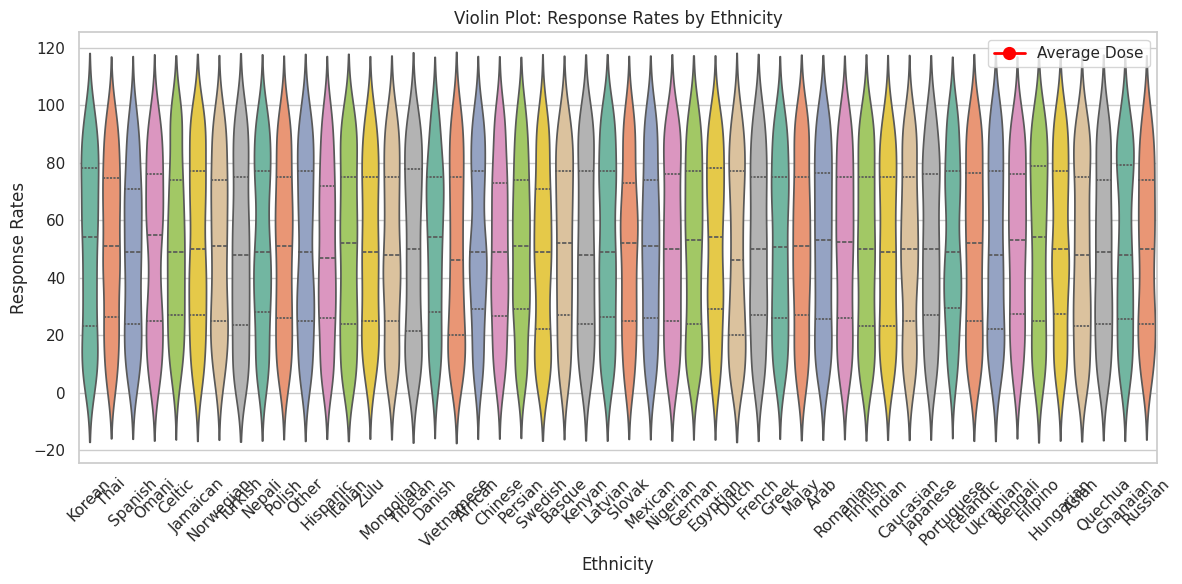

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df['Dose'] = pd.to_numeric(df['dose'], errors='coerce')

plt.figure(figsize=(12, 6))
sns.violinplot(x='Ethnicity', y='Response rates', data=df, inner='quartile', hue='Ethnicity', palette='Set2', legend=False)
plt.title('Violin Plot: Response Rates by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Response Rates')
plt.xticks(rotation=45)

average_dose = df.groupby('Ethnicity')['Dose'].mean().reset_index()
sns.pointplot(x='Ethnicity', y='Dose', data=average_dose, color='red', marker='o', label='Average Dose', linewidth=2, markersize=8)

plt.legend()
plt.tight_layout()
plt.show()


# Model Evaluation

In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

def load_data(file_path):
    return pd.read_excel(file_path)

def preprocess_data(df, target_column):
    X = df.drop(columns=[target_column])
    y = df[target_column]

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

    return X_train, X_val, X_test, y_train, y_val, y_test

def create_pipeline(num_columns, cat_columns, model):
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), num_columns),
            ('cat', OneHotEncoder(), cat_columns)
        ]
    )

    return ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])

def evaluate_and_test_model(model, X_val, y_val, X_test, y_test):
    y_val_pred = model.predict(X_val)
    print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
    print(classification_report(y_val, y_val_pred))

    sample = X_test.sample(n=1)
    original_value = y_test.loc[sample.index[0]]
    predicted_value = model.predict(sample)[0]
    print(f"Original Value: {original_value}, Predicted Value: {predicted_value}")

def main(file_path, target_column):
    df = load_data(file_path)
    X_train, X_val, X_test, y_train, y_val, y_test = preprocess_data(df, target_column)

    cat_columns = X_train.select_dtypes(include=["object"]).columns.tolist()
    num_columns = X_train.select_dtypes(exclude=["object"]).columns.tolist()

    models = {
        "Random Forest": RandomForestClassifier(),
        "Logistic Regression": LogisticRegression(max_iter=200),
        "Support Vector Classifier": SVC(class_weight='balanced'),
        "Gradient Boosting": GradientBoostingClassifier(),
    }

    param_grids = {
        "Random Forest": {'classifier__n_estimators': [100], 'classifier__max_depth': [5]},
        "Logistic Regression": {'classifier__C': [1], 'classifier__penalty': ['l2']},
        "Support Vector Classifier": {'classifier__C': [1], 'classifier__gamma': ['auto']},
        "Gradient Boosting": {
            'classifier__n_estimators': [50],
            'classifier__learning_rate': [0.01],
            'classifier__max_depth': [3],
            'classifier__max_features': ['sqrt']
        },
    }

    for model_name, model in models.items():
        print(f"\nEvaluating {model_name} ...")
        pipeline = create_pipeline(num_columns, cat_columns, model)
        grid_search = GridSearchCV(pipeline, param_grid=param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)

        best_model = grid_search.best_estimator_
        evaluate_and_test_model(best_model, X_val, y_val, X_test, y_test)

main('/content/drive/MyDrive/Project/Raw_Healthcare_datasets/pharma_data.xlsx', 'Drug_Efficacy')


Evaluating Random Forest ...
Validation Accuracy: 0.9325
              precision    recall  f1-score   support

        High       0.90      1.00      0.95      1217
         Low       1.00      1.00      1.00       391
      Medium       0.98      0.67      0.80       392

    accuracy                           0.93      2000
   macro avg       0.96      0.89      0.91      2000
weighted avg       0.94      0.93      0.93      2000

Original Value: High, Predicted Value: High

Evaluating Logistic Regression ...
Validation Accuracy: 0.9740
              precision    recall  f1-score   support

        High       0.99      0.98      0.99      1217
         Low       0.99      0.97      0.98       391
      Medium       0.91      0.96      0.94       392

    accuracy                           0.97      2000
   macro avg       0.96      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000

Original Value: High, Predicted Value: High

Evaluating Support Vector C

In [5]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

def load_data(file_path):
    return pd.read_excel(file_path)

def preprocess_data(df, target_column):
    X = df.drop(columns=[target_column])
    y = df[target_column]

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

    return X_train, X_val, X_test, y_train, y_val, y_test

def create_pipeline(num_columns, cat_columns, model):
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), num_columns),
            ('cat', OneHotEncoder(), cat_columns)
        ]
    )

    return ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])

def evaluate_and_test_model(model, X_val, y_val, X_test, y_test):
    y_val_pred = model.predict(X_val)
    print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
    print(classification_report(y_val, y_val_pred))

    sample = X_test.sample(n=1)
    original_value = y_test.loc[sample.index[0]]
    predicted_value = model.predict(sample)[0]
    print(f"Original Value: {original_value}, Predicted Value: {predicted_value}")

def main(file_path, target_column):
    df = load_data(file_path)
    X_train, X_val, X_test, y_train, y_val, y_test = preprocess_data(df, target_column)

    cat_columns = X_train.select_dtypes(include=["object"]).columns.tolist()
    num_columns = X_train.select_dtypes(exclude=["object"]).columns.tolist()

    models = {
        "Random Forest": BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=10, random_state=42),
        "Logistic Regression": BaggingClassifier(estimator=LogisticRegression(max_iter=200), n_estimators=10, random_state=42),
        "Support Vector Classifier": BaggingClassifier(estimator=SVC(class_weight='balanced'), n_estimators=10, random_state=42),
        "Gradient Boosting": BaggingClassifier(estimator=GradientBoostingClassifier(), n_estimators=10, random_state=42),
    }

    param_grids = {
        "Random Forest": {'classifier__estimator__n_estimators': [100], 'classifier__estimator__max_depth': [5]},
        "Logistic Regression": {'classifier__estimator__C': [1], 'classifier__estimator__penalty': ['l2']},
        "Support Vector Classifier": {'classifier__estimator__C': [1], 'classifier__estimator__gamma': ['auto']},
        "Gradient Boosting": {
            'classifier__estimator__n_estimators': [50],
            'classifier__estimator__learning_rate': [0.01],
            'classifier__estimator__max_depth': [3],
            'classifier__estimator__max_features': ['sqrt']
        },
    }

    for model_name, model in models.items():
        print(f"\nEvaluating {model_name} ...")
        pipeline = create_pipeline(num_columns, cat_columns, model)
        grid_search = GridSearchCV(pipeline, param_grid=param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)

        best_model = grid_search.best_estimator_
        evaluate_and_test_model(best_model, X_val, y_val, X_test, y_test)

main('/content/drive/MyDrive/Project/Raw_Healthcare_datasets/pharma_data.xlsx', 'Drug_Efficacy')


Evaluating Random Forest ...
Validation Accuracy: 0.9935
              precision    recall  f1-score   support

        High       0.99      1.00      0.99      1217
         Low       1.00      1.00      1.00       391
      Medium       1.00      0.97      0.98       392

    accuracy                           0.99      2000
   macro avg       1.00      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000

Original Value: High, Predicted Value: High

Evaluating Logistic Regression ...
Validation Accuracy: 0.9765
              precision    recall  f1-score   support

        High       0.99      0.98      0.99      1217
         Low       0.99      0.97      0.98       391
      Medium       0.92      0.97      0.94       392

    accuracy                           0.98      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.98      0.98      0.98      2000

Original Value: High, Predicted Value: High

Evaluating Support Vector C

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Scraping (Optional)

In [ ]:
import re
import requests
from bs4 import BeautifulSoup

drug_names = []

def names(chars):
  url = f"https://www.rxlist.com/script/main/alphaidx.asp?p={chars}_rx-class"

  response = requests.get(url)

  if response.status_code == 200:

      soup = BeautifulSoup(response.content, 'html.parser')

      main_section = soup.find('div', {'id': 'AZ_container'})

      if main_section:
          drug_list_items = main_section.find_all('li')

          for item in drug_list_items:
              link = item.find('a')
              if link:
                  drug_name = link.text.strip().title()
                  drug_name = re.split(r'[,\s/]+',drug_name)[0]
                  if drug_name != "How" and drug_name != "What":
                     if drug_name not in drug_names:
                        drug_names.append(drug_name)

  else:
      print(f"Failed to retrieve the webpage. Status code: {response.status_code}")

for i in range(65,91):
  names(chr(i))

for name in drug_names:
    print(f"Drug Name: {name}")

Drug Name: Aceihctz
Drug Name: Adaptogens
Drug Name: Adenosine
Drug Name: Adjunct
Drug Name: Allergen
Drug Name: Allergy
Drug Name: Analgesic
Drug Name: Analgesics
Drug Name: Anesthetics
Drug Name: Angiotensin
Drug Name: Anthelmintics
Drug Name: Anti-Bcma
Drug Name: Anti-Nectin-4
Drug Name: Antiandrogens
Drug Name: Antianginal
Drug Name: Antibiotics
Drug Name: Anticonvulsants
Drug Name: Antidepressants
Drug Name: Antidiabetics
Drug Name: Antidiuretics
Drug Name: Antihistamine
Drug Name: Antihistamines
Drug Name: Antimalarials
Drug Name: Antimanic
Drug Name: Antimicrobials
Drug Name: Antineoplastic
Drug Name: Antineoplastics
Drug Name: Antiplatelet
Drug Name: Antipsychotics
Drug Name: Antithyroid
Drug Name: Antitussive
Drug Name: Antitussives
Drug Name: Antiviral
Drug Name: Antivirals
Drug Name: Anxiolytics
Drug Name: Appetite
Drug Name: Augmentin
Drug Name: B
Drug Name: Benzodiazepines
Drug Name: Beta
Drug Name: Beta-Blocker
Drug Name: Beta-Blockers
Drug Name: Bipolar
Drug Name: Bispho

## Challenges Faced
* #### Access Issues: The scraping function did not work as expected due to potential access issues with the external website, such as changes in its structure or restrictions on automated requests.
* #### Rate Limiting: Websites often have measures to block repeated requests from the same IP address within a short timeframe, which may have hindered the scraping process.
* #### Data Integrity: Variability in data presentation on the target website could result in inconsistent scraping results.

# Conclusion

### The project provides a comprehensive analysis and visualization of drug response rates through various demographic and medical features, highlighting significant patterns and associations. Future work could involve implementing more machine learning models for classification based on the insights gathered.